<a href="https://colab.research.google.com/github/rupaidutta66/Text_Extract_from_PDF/blob/feature%2FText_Extract/Text_Extraction_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  InRelease
Get:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease [18.1 kB]
Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu focal InRelease
Get:8 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ Packages [71.1 kB]
Get:9 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:13 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:14 http://ppa.launchpad.net/gr

In [ ]:
!sudo apt-get install -y poppler-utils


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 21 not upgraded.
Need to get 174 kB of archives.
After this operation, 754 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 poppler-utils amd64 0.86.1-0ubuntu1.1 [174 kB]
Fetched 174 kB in 1s (309 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: 

In [ ]:
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.2/619.2 KB 43.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 KB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 47.6/47.6 MB 97.9 MB/s eta 0:00:01
ERROR: Operation cancelled by user


In [ ]:
!pip install pdf2image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pdf2image import convert_from_path
# import easyocr
# import numpy as np
# import PIL
import cv2
# from PIL import ImageDraw
import numpy as np

In [ ]:
reader = easyocr.Reader(['en'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [ ]:
img = convert_from_path("/content/Hengyang-3.pdf", dpi=300 )
gray = cv2.cvtColor(np.array(img[0]), cv2.COLOR_BGR2GRAY)
threshold, binarized_image = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


In [ ]:
binarized_image

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [ ]:
bounds = reader.readtext(np.array(img[0]), min_size=0, slope_ths=0.2, ycenter_ths=0.6, width_ths= 0.7, decoder='beamsearch', beamWidth=10)
bounds

NameError: ignored

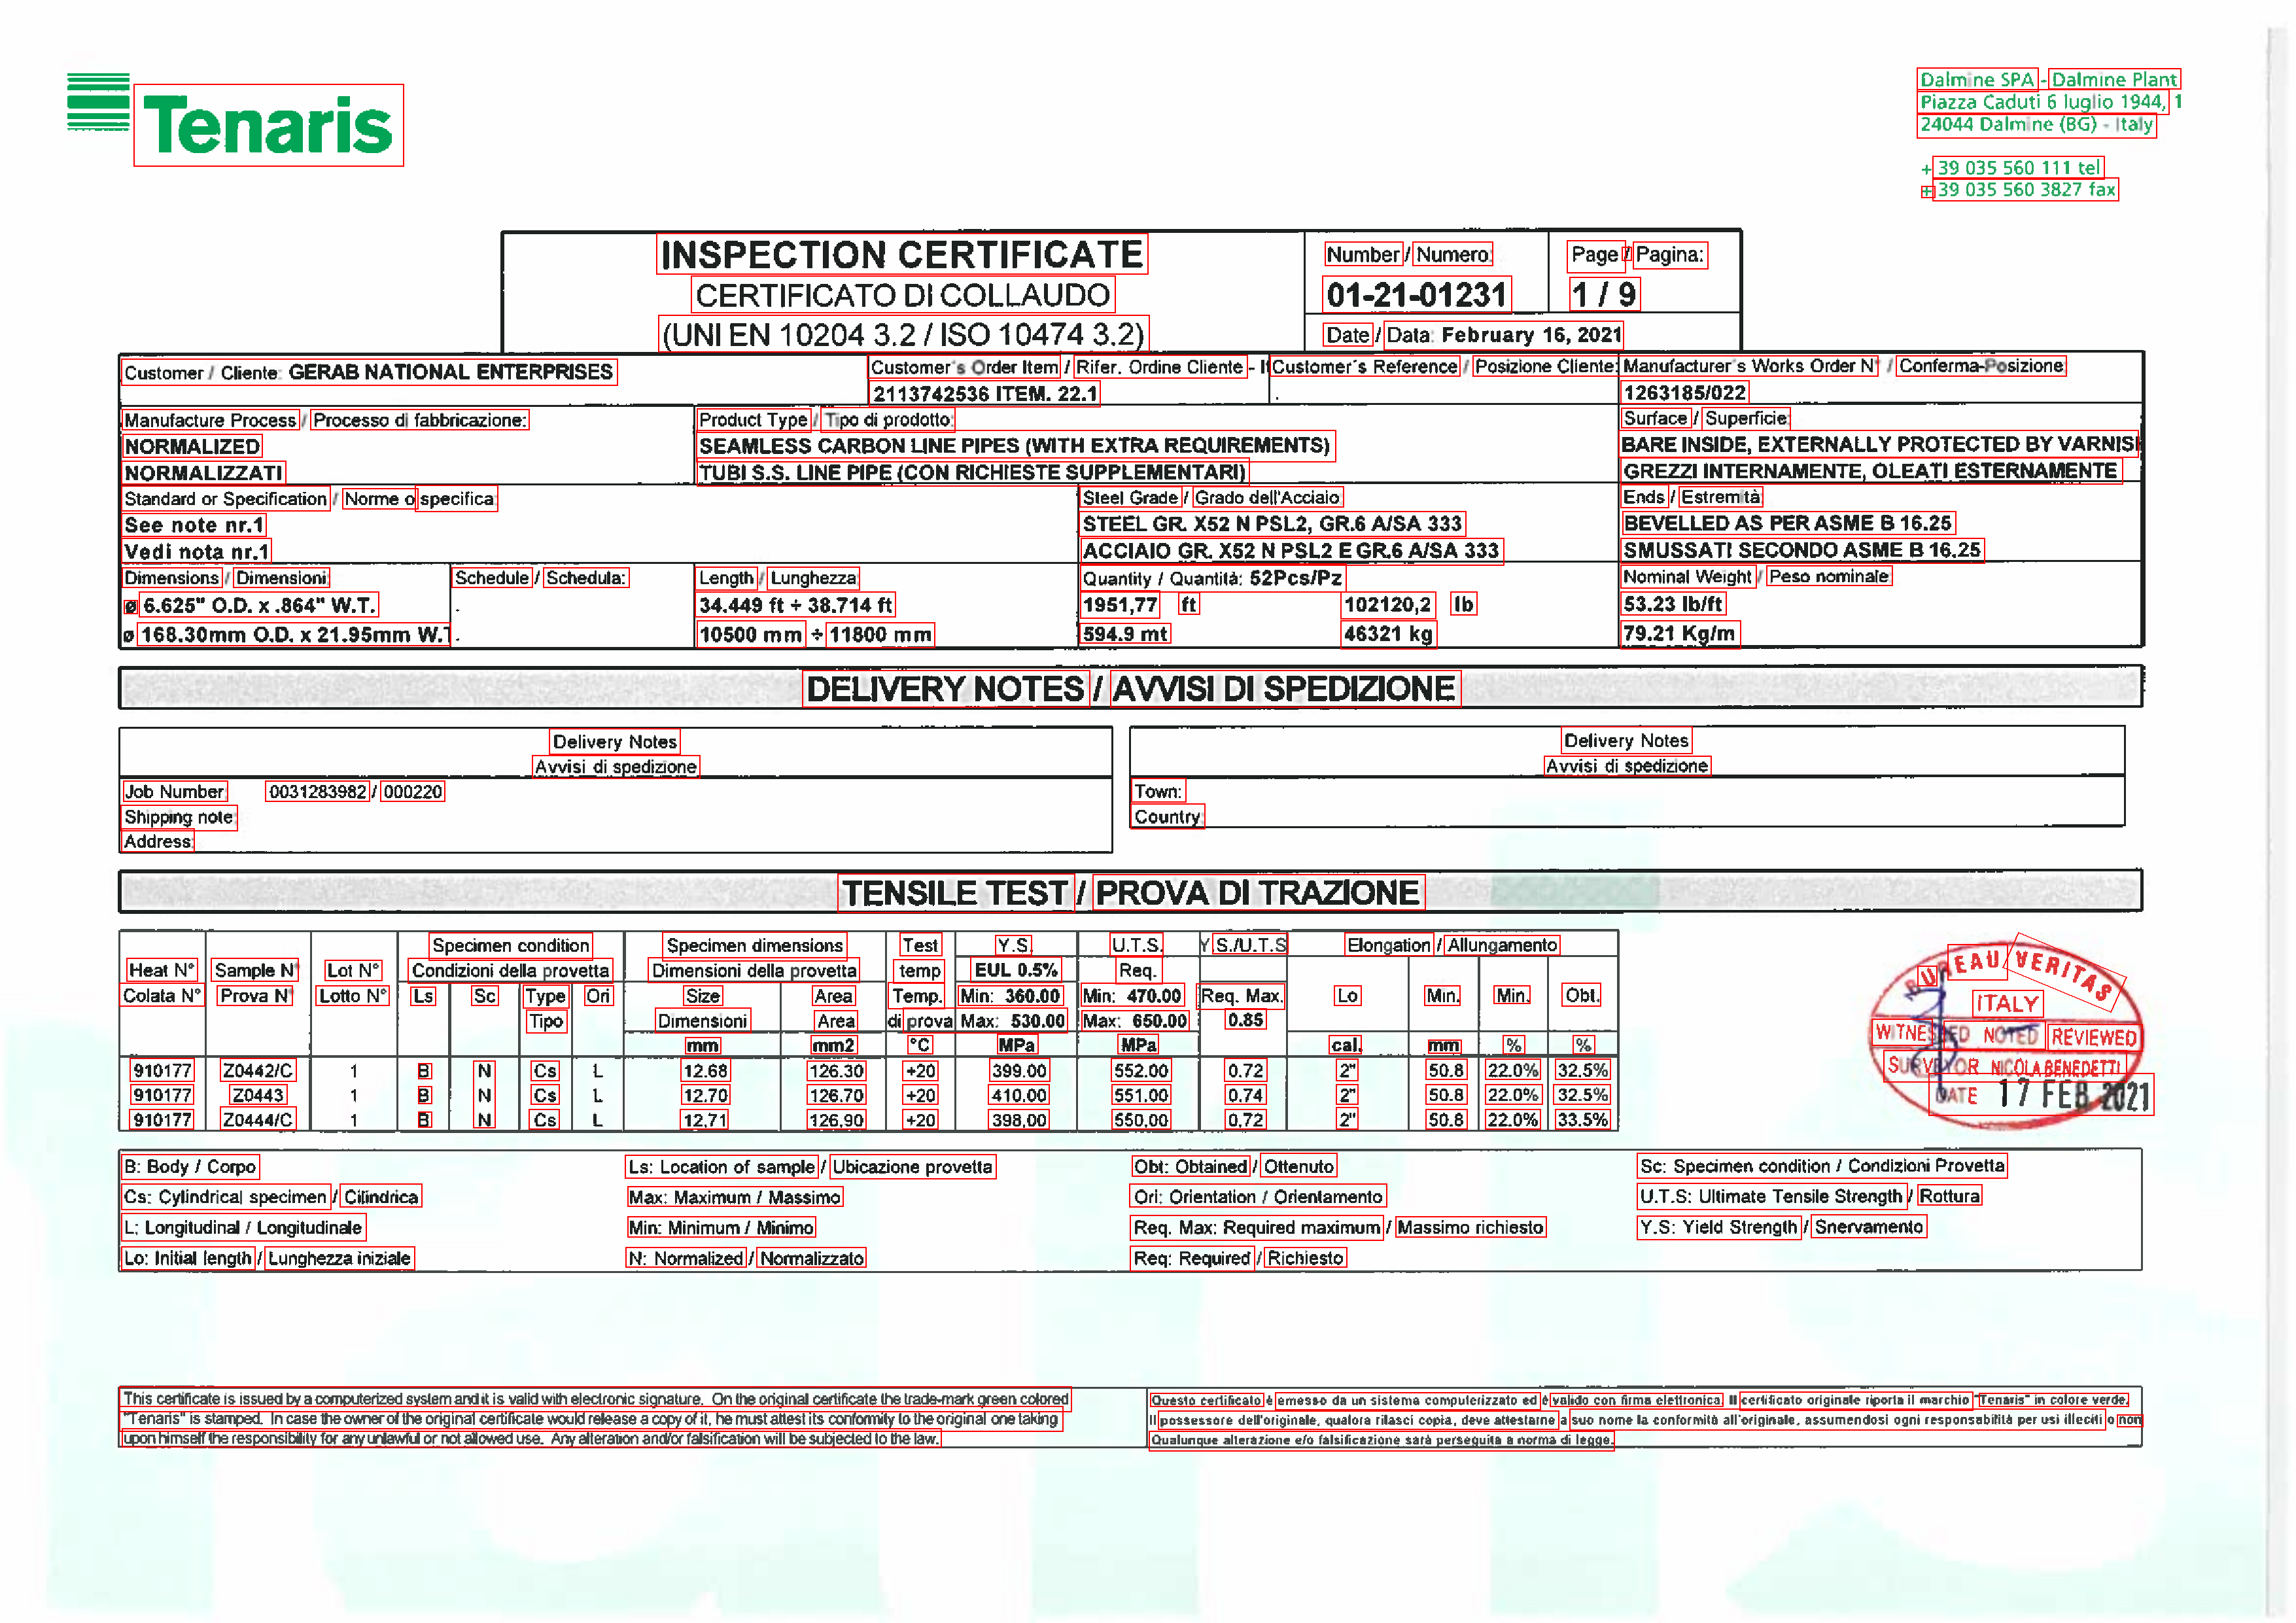

In [ ]:
def draw_boxes(image, bounds, color='red', width=2):
  draw = ImageDraw.Draw(image)
  for i in bounds:
    p0, p1, p2, p3 = i[0]
    draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    # draw.rectangle(((p3),(p0)), fill=color, width=width)
  return image

draw_boxes(img[0], bounds)

In [ ]:
bounds[3][1]

'Certificate No. THO13631'

In [ ]:
text = ''
for i in range(len(bounds)):
  text += bounds[i][1] +'\n'

print(text)


Dalm ne SPA
Dalmine Plant
Piazza Caduti 6 luglio 1944,
Tenaris
24044 Dalm ne (BG} - Italy
39 035 560 111 tel
+
39 035 560 3827 fax
INSPECTION CERTIFICATE
Number
Numero
Page =
1
Pagina:
CERTIFICATO DI COLLAUDO
01-21-01231
1/9
(UNIEN 10204 3.2/ISO 10474 3.2)
Date
Dala February 16, 2021
Customer ! Cliente GERAB NATIONAL ENTERPRISES
Customer s Order Item
Rifer . Ordine Clienle
Customer $ Relerence
Posizione Cliented Manufacturer s Works Order N
Conferma- 'osizione
2113742536 ITEM 221
1263185/022
Manufacture Process
Processo di fabbricazione:
Product Type
Tpo di prodotto
Surface
Superficie
NORMALIZED
SEAMLESS CARBON LINE PIPES (WiTH EXTRA REQUIREMENTS)
BARE INSIDE, EXTERNALLY PROTECTED BY VARNISL
NORMALIZZATI
TubisSLINE PIPE (CON RICHIESTE SUPPLEMENTARI
GREZZI INTERNAMENTE OLEATI ESTERNAMENTE
Standard or Specification
Nome 0
specifica
Sleel Grade
Grado dell'Acciaio
Ends
Estrem ta
See note nr.1
STEEL Gr X52 N PSLZ, GR.6 AISA 333
beveLLeD As per ASME B 16.25
Vedi nota n1
AcCIAIQ GR X52NPSLZEG

In [ ]:
img[0]

In [ ]:
!pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import spacy


In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
doc = nlp(text)

In [ ]:
from spacy import displacy
displacy.render(doc, style='ent', jupyter=True)

#**Partition**

# **Using Pytesseract**



In [ ]:
!pip install pytesseract
!sudo apt install tesseract-ocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 32.7 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 21 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 0s (12.5 MB/s)
debconf: unable to initialize frontend

In [ ]:
import pytesseract


In [ ]:
# pytesseract.pytesseract.tesseract_cmd = (r'/usr/bin/tesseract')

In [ ]:
text1 = pytesseract.image_to_string(img[0])
print(text1)

  
 
 

2248 A be] HENG YANG VALIN STEEL TUBE CO., LTD

beter jh EW

Scanned QR -h | 4 be IS Wie

0187637

LPN GG OSH THAR 10% tb 421001
: aD ixincun, Hengyang City, Hunan,P.R.China P.C.:421001

  
  
  
    

 
 
     
     

    
 

 

     
    
 
   
 

     
  
 

   
  

 

 

Code verifiable FE GB oF
mic OL ai: e sc@hys
aero! a INSPECTION CERTIF EWE sigc@hysteeltube.com
pee ae Aa
r ees ACCORDING TO EN10204-2004 3.1 NCD A : Hat CERTIFICATE NO.: 20200883
ERA NATIONAL TERRI Peano, oe

PROCESS OF MANUFACTURE Nowa Ca cog Be
API SL 46TH PSL2 /ASTM A106/A53 2018/ASME SA106 2019 Gr.B /KOC-MS-001 PARTI REV.2/NACE MRO175-2015/1ISO15156-2015/NACE MR0103-2015/ASME B36.10

 

 
  

 

   
  

DIMENSIONS: 610mm*12.7mm*1 Im~1 1.8m [ GRADE: B/BNS/X42NS LIC ISSUING BANK:

REMARK: 1,FULL DESCRIPTION OF THE MATERIAL AS PER APPLICANT'S PURCHASE ORDER. 2,Steel Making Process by Electric Arc Furnace,vacuum degassed, fully killed & fine grain practice
3,Compliance to ASME Section II part A 5,MPI(1/50)

In [ ]:
print(text)

ISO 9001
2015 Manufacturing Company
Certificated by BUREAU VERITAS
Certificate No. THO13631
INSPECTION CERTIFICATE
Awaji
ASK
EN 10204 3.1
2004
Material manufacturer QMS acc PED
2014/68/EU
Annexl
Par4.3 ADzOOO-WO
AWAJI MATERIA (THAILAND) COLTD:
Certified by Lloyd's Register Vertification Limited
Certificate No. PED 50331/1
81,MOO4, PRAKASA ROAD, TAMBOL BANGMUANG, AMPHUR MUANG
SAMUTPRAKARN THAILAND 10270,
Tel : (662)701-5226
Date
31/08/2018
Purchaser
GERAB NATIONAL ENTERPRISES LLC
MADE FROM SEAMLESS STEEL PIPE
Certificate No
TAT18-02470
Order No_
Job No_
Product
Raw Material Pipe Maker
2213706188
TUBACEX PRAKASH INDIA PVT LTD
STAINLESS STEEL BUTT WELDING FITTINGS
Inspection Standard
Material Standard
Pipe Heat No.
7316
ASME B16.9-12
ASTM A403-18
Visual
Dimension
*2
UT Inspection
ASTM A960-16a
ASME SA403-18 (ASTM A403-07)
NACE MR-0175/ ISO 15156-15
except nuclear usage
GOOD
GOOD
U.T.W.T INSPECTED
NACE MR-0103-15
Manufacturing No
Product Code
Material
Article & Size
Quantity(pcs)
Note
(Hea

In [ ]:
import re


#**DATE**

In [ ]:
date_pattern = r'\d{2}\/\d{2}\/\d{4}'
match = re.search(date_pattern, text)

if match:
  date = match.group()
  print(f'Date:{date}')


Date:31/08/2018


#**Certificate NO**

In [ ]:
pattern = re.compile(r'Certificate No\s(\w+-\d+)')
certificate_main = pattern.search(text)
print(f'Certificate NO(M):{certificate_main.group(1)}')

Certificate NO(M):TAT18-02470


In [ ]:
x = re.search(r'Purchaser\n(.*)',text)
x.group(1)==True

False

In [ ]:
pattern = re.compile(r'Certificate No\.\s(\w+\s\d+\/\d)', flags=re.I)
certificate_no = pattern.search(text)
print(f'Certificate NO1:{certificate_no.group(1)}')

Certificate NO1:PED 50331/1


In [ ]:

certificate_pattern = r"Certificate No\.\s(\w+)"
match = re.search(certificate_pattern, text)
if match:
  certificate_number = match.group(1)
  print(f'Certificate NO2:{certificate_number}')



Certificate NO2:THO13631


#**ORDER NO**

In [ ]:
pattern = re.compile(r'(?<=Order No$)(\d+)')
order_no = pattern.search(text)
print(f'Order NO:{order_no}')


Order NO:None


In [ ]:
pattern = "Order No_\s\w*(\d+)"

match = re.search(pattern, text)

if match:
    order_no = match.group(1)
    print(order_no)

In [ ]:
match==True

False

In [ ]:
order_number = re.search(r'\d{10}', text)
if order_number:
    print(f'Order No:{order_number.group()}')
else:
    print("Order number not found")


Order No:2213706188


In [ ]:
product_pattern = re.compile(r'STAINLESS STEEL BUTT WELDING FITTINGS')
match = product_pattern.search(text)
if match:
  product = match.group()
  print(f'Product:{product}')


Product:STAINLESS STEEL BUTT WELDING FITTINGS


In [ ]:
#PIPE_HEAT_NO_PATTERN
pipe_heat_no_pattern = r'Pipe Heat No.\n(\d+)'


**Material**

In [ ]:
pattern = re.compile(r'(\w{3,}\/\w{3,})', flags=re.I)
material = pattern.search(text)
print(f'Material:{material.group()}')

Material:WP304/304LS


In [ ]:
quantity_pattern = r'Quantity\(pcs\)\s+(\d+)'
quantity = re.search(quantity_pattern, text).group(2)
quantity

AttributeError: ignored

In [ ]:
manufacturing_no_pattern = r'Manufacturing No\s+(\w+)'
manufacturing_no = re.search(manufacturing_no_pattern, text).group(1)
manufacturing_no

'Product'

In [ ]:
article_size_pattern = r'(\w+ \d{3}\/\d+.*)'
article_size = re.search(article_size_pattern,text).group()
article_size

'ASME 304/304L 90L 2 S8OS'

In [ ]:
pipe_maker_pattern = r'(\w+ \w+ \w{5} \w+ \w{3}$)'
pipe_maker_pattern = re.search(pipe_maker_pattern,text).group()
pipe_maker_pattern

AttributeError: ignored

In [ ]:
purchaser = r'Purchaser\n(\w+ .*)'
purchaser_ = re.search(purchaser, text).group(1)
purchaser_

'GERAB NATIONAL ENTERPRISES LLC'

In [ ]:
#for fields in text:
date_pattern = r'\d{2}\/\d{2}\/\d{4}'
certificate_pattern = r'Certificate No\s(\w+-\d+)'

product_pattern = re.compile(r'STAINLESS STEEL BUTT WELDING FITTINGS')
material_pattern = r'(\w{3,}\/\w{3,})'
pipe_heat_no_pattern = r'Pipe Heat No\.\n(\d+)'
article_size_pattern = r'(\w+ \d{3}\/\d+.*)'


date = re.search(date_pattern, text).group()
certificate = re.search(certificate_pattern, text).group(1)

order_number = re.search(r'\d{10}', text).group()
product = re.search(product_pattern,text).group()
material = re.search(material_pattern,text).group()
pipe_heat_no = re.search(pipe_heat_no_pattern,text).group(1)
article_size = re.search(article_size_pattern,text).group()

print('Date:{}\nCertificate No:{}\nRaw Pipe Maker:{}\nOrder No:{}\nProduct:{}\nMaterial:{}\nPipe_heat_no:{}'.format(date, certificate, order_number, product, material, pipe_heat_no, article_size))


Date:31/08/2018
Certificate No:TAT18-02470
Raw Pipe Maker:2213706188
Order No:STAINLESS STEEL BUTT WELDING FITTINGS
Product:WP304/304LS
Material:7316
Pipe_heat_no:ASME 304/304L 90L 2 S8OS
